# 1: Exploratory data analysis

We start by looking at how to explore our data. We will cover

* Categorical variables
* Numeric variables
* Looking for outliers
* Exploring correlations in the data

Some extrnal resources that you might find useful:

* https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

# use sklearn to import a dataset
from sklearn.datasets import load_wine

## Import the data
Importing a dataset is simple with Pandas through functions dedicated to reading the data. If our dataset is a .csv file, we can just use

`df = pd.read_csv("path/to/my/file.csv")`

df stands for dataframe, which is Pandas’s object similar to an Excel sheet. This nomenclature is often used in the field. The read_csv function takes as input the path of the file we want to read. There are many other arguments that we can specify.

The .csv format is not the only one we can import — there are in fact many others such as Excel, Parquet and Feather.

For ease, in this example we will use Sklearn to import the wine dataset.

We eill set a new column called `target` which is a class for the wines.

In [3]:
# carichiamo il dataset
wine = load_wine()

# convertiamo il dataset in un dataframe Pandas
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
# creiamo la colonna per il target
df["target"] = wine.target

## Take a quick look using Pandas

Two of the most commonly used functions in Pandas are `.head()` and `.tail()`. These two allow us to view an arbitrary number of rows (by default 5) from the beginning or end of the dataset. Very useful for accessing a small part of the dataframe quickly.

We can also use:
* `.shape`
* `.describe()`
* `.info()`

**Note** the `.shape` call is not followed by parentheses `()`; this is beacause `shape` is an attribute of the dataset, whereas `describe` for example is a function that acts on the dataset.

In [4]:
df.tail(3)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
175        0.69                  0.43             1.35             10.2  0.59   
176        0.68                  0.53             1.46              9.3  0.60   
177        0.76                  0.56             1.35              9.2  0.61   

     od280/od315_of_diluted_wines  proline  target  
175                          1.56    835.0       2  
176                          1.62    840.0       2  
177                          1.60    560.0       2

In [5]:
df.shape

(178, 14)

In [6]:
df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

           target  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

Notice that info gives quite different results to describe. Info tells us about the data types - describe gives us some summary statistics.

## Make names more sensible

The name `od280/od315_of_diluted_wines` refers to a test for protein content. But it is not very descriptive to us, let's chance it to make life easier for ourselves later.

In [8]:
df.rename(columns={"od280/od315_of_diluted_wines": "protein_concentration"}, inplace=True)

## Undestanding the variables

We will look at two main types of variable discussed in the lecture: categorical and numeric.

### Categorical variables

Categorical variables are those where the data are labelled by class, for example it could be data on something like postcode. If we had labelled houses by postcode, then this is said to be categorical data.

Let's look at the distribution of the types for the wines, the `target` column


In [9]:
df.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [10]:
df.target.value_counts(normalize=True)

1    0.398876
0    0.331461
2    0.269663
Name: target, dtype: float64

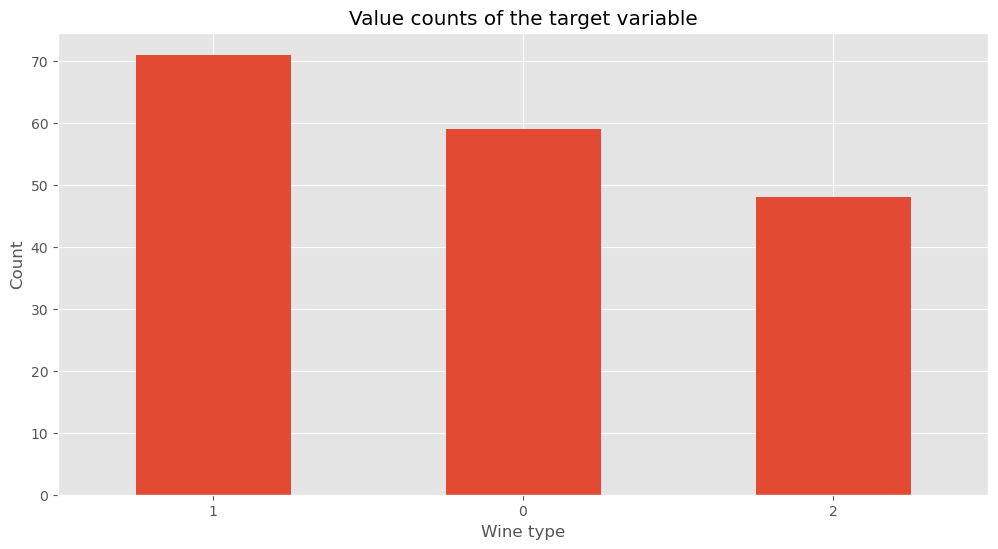

In [16]:
df.target.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("Wine type")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

### Numeric values

Numeric data is when we assign a numerical value as the label of an instance. To take the houses example again, we might label the houses by the distance to the nearest bus stop, this would then be a numeric data set.

We can perform exploratory analysis of the numeric values using the `.describe()` function.

In [17]:
df.magnesium.describe()

count    178.000000
mean      99.741573
std       14.282484
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      162.000000
Name: magnesium, dtype: float64

<AxesSubplot: >

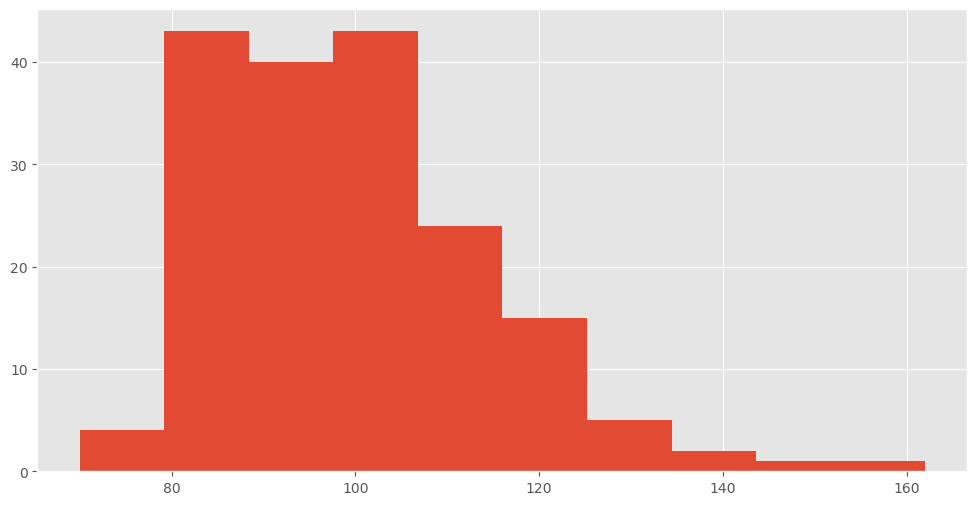

In [18]:
df.magnesium.hist()

Question do you think this has high/low skew - or high/low kurotis?

In [11]:
print(f"Skewness: {df['magnesium'].skew()}")
print(f"Kurtosis: {df['magnesium'].kurt()}")

Skewness: 1.098191054755161
Kurtosis: 2.1049913235905557


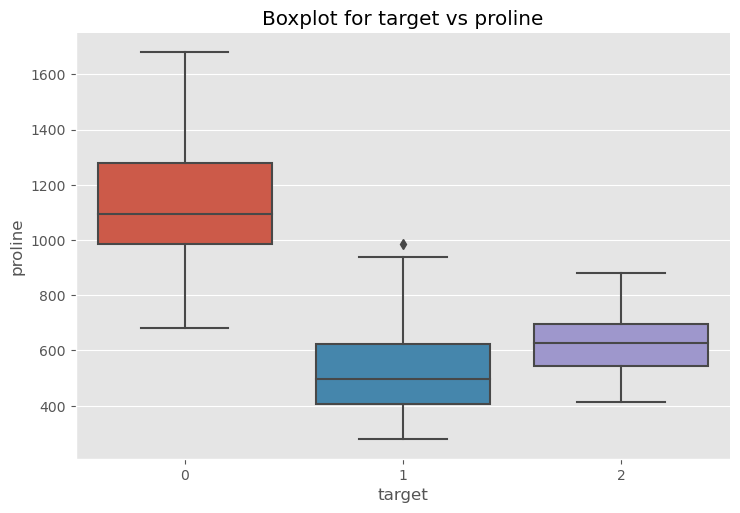

In [12]:
sns.catplot(x="target", y="proline", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for target vs proline")
plt.show()

## Question which of the datasets might have an outlier

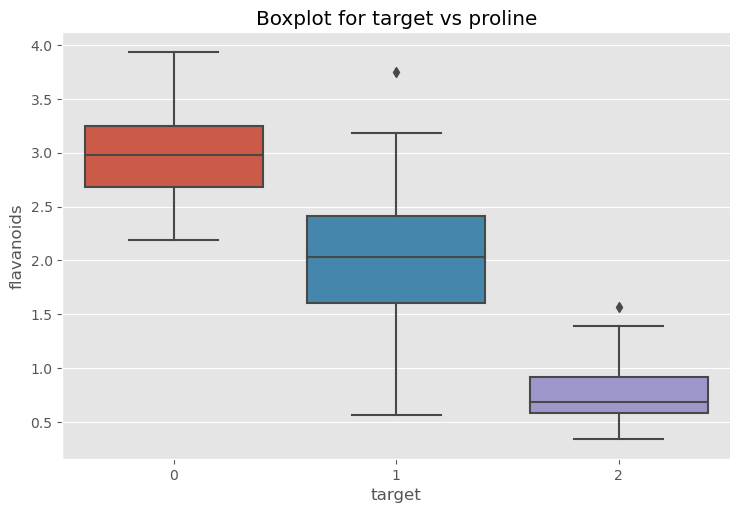

In [27]:
sns.catplot(x="target", y="flavanoids", data=df, kind="box", aspect=1.5)
plt.title("Boxplot for target vs proline")
plt.show()

## Take a closer look at the outlier

In [25]:
df[df['flavanoids'] > 5]

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
121    11.56        2.05  3.23               28.5      119.0           3.18   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
121        5.08                  0.47             1.87              6.0  0.93   

     protein_concentration  proline  target  
121                   3.69    465.0       1

We can then remove that data from the data set, if we choose to.

In [26]:
df = df.drop(121)

## Explore correlations in the data

As we discussed in the lecture we might want to remove features in the data that are very closely related to one another. Imagine a data set that had one feature with temperature in F and one with temperature in C. Now these two features tell us exactly the same thing, but on a different scale. Later we will see that adding both to a model would be of no benifit, as they do not carry any extra information. To look for redundant information between features ($x$ and $y$) we can use the correlation.
$$
r = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum(x_i - \bar{x})^2(y_i - \bar{y})^2}}
$$


In [23]:
corrmat = df.corr()
corrmat

alcohol  malic_acid       ash  alcalinity_of_ash  \
alcohol                1.000000    0.094397  0.211545          -0.310235   
malic_acid             0.094397    1.000000  0.164045           0.288500   
ash                    0.211545    0.164045  1.000000           0.443367   
alcalinity_of_ash     -0.310235    0.288500  0.443367           1.000000   
magnesium              0.270798   -0.054575  0.286587          -0.083333   
total_phenols          0.289101   -0.335167  0.128980          -0.321113   
flavanoids             0.236815   -0.411007  0.115077          -0.351370   
nonflavanoid_phenols  -0.155929    0.292977  0.186230           0.361922   
proanthocyanins        0.136698   -0.220746  0.009652          -0.197327   
color_intensity        0.546364    0.248985  0.258887           0.018732   
hue                   -0.071747   -0.561296 -0.074667          -0.273955   
protein_concentration  0.072343   -0.368710  0.003911          -0.276769   
proline                0.643720   -0.192011  0.223626          -0.440597   
target                -0.328222    0.437776 -0.049643           0.517859   

                       magnesium  total_phenols  flavanoids  \
alcohol                 0.270798       0.289101    0.236815   
malic_acid             -0.054575      -0.335167   -0.411007   
ash                     0.286587       0.128980    0.115077   
alcalinity_of_ash      -0.083333      -0.321113   -0.351370   
magnesium               1.000000       0.214401    0.195784   
total_phenols           0.214401       1.000000    0.864564   
flavanoids              0.195784       0.864564    1.000000   
nonflavanoid_phenols   -0.256294      -0.449935   -0.537900   
proanthocyanins         0.236441       0.612413    0.652692   
color_intensity         0.199950      -0.055136   -0.172379   
hue                     0.055398       0.433681    0.543479   
protein_concentration   0.066004       0.699949    0.787194   
proline                 0.393351       0.498115    0.494193   
target                 -0.209179      -0.719163   -0.847498   

                       nonflavanoid_phenols  proanthocyanins  color_intensity  \
alcohol                           -0.155929         0.136698         0.546364   
malic_acid                         0.292977        -0.220746         0.248985   
ash                                0.186230         0.009652         0.258887   
alcalinity_of_ash                  0.361922        -0.197327         0.018732   
magnesium                         -0.256294         0.236441         0.199950   
total_phenols                     -0.449935         0.612413        -0.055136   
flavanoids                        -0.537900         0.652692        -0.172379   
nonflavanoid_phenols               1.000000        -0.365845         0.139057   
proanthocyanins                   -0.365845         1.000000        -0.025250   
color_intensity                    0.139057        -0.025250         1.000000   
hue                               -0.262640         0.295544        -0.521813   
protein_concentration             -0.503270         0.519067        -0.428815   
proline                           -0.311385         0.330417         0.316100   
target                             0.489109        -0.499130         0.265668   

                            hue  protein_concentration   proline    target  
alcohol               -0.071747               0.072343  0.643720 -0.328222  
malic_acid            -0.561296              -0.368710 -0.192011  0.437776  
ash                   -0.074667               0.003911  0.223626 -0.049643  
alcalinity_of_ash     -0.273955              -0.276769 -0.440597  0.517859  
magnesium              0.055398               0.066004  0.393351 -0.209179  
total_phenols          0.433681               0.699949  0.498115 -0.719163  
flavanoids             0.543479               0.787194  0.494193 -0.847498  
nonflavanoid_phenols  -0.262640              -0.503270 -0.311385  0.489109  
proanthocyanins        0.295

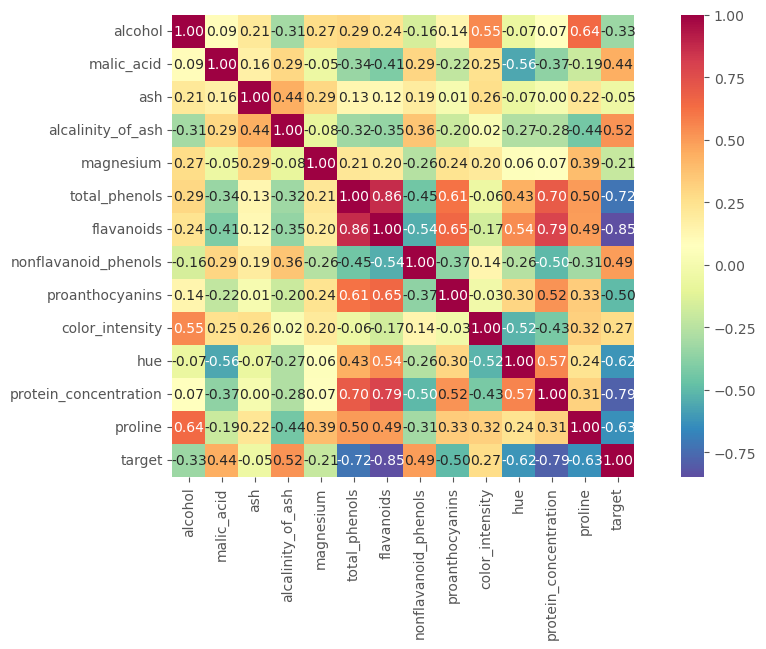

In [24]:
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")
plt.show()

Question - which data are most correlated. If you had to choose to drop one column based on the relation to the target, which would it be? If you had to drop one of the strongly correlated columns, which would it be? 